# Prediksi Berbayar atau tidaknya Course berdasarkan durasi seluruh konten course pada Udemy menggunakan Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
df.isna().values.any()

False

In [4]:
print(df.dtypes)

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

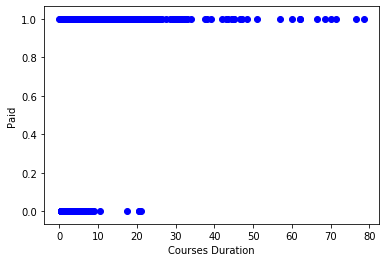

In [6]:
plt.xlabel("Courses Duration")
plt.ylabel("Paid")

pltX = df.loc[:, "content_duration"]
pltY = df.loc[:, "is_paid"]
plt.scatter(pltX, pltY, color="blue", label="Paid")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['content_duration']],df.is_paid)

In [8]:
X_test

,content_duration
1209,1.000000
3486,4.000000
2149,1.500000
2900,12.500000
2636,18.000000
495,1.500000
3387,2.000000
1246,1.000000
2316,3.500000
2173,2.000000


In [9]:
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
X_test

,content_duration
1209,1.000000
3486,4.000000
2149,1.500000
2900,12.500000
2636,18.000000
495,1.500000
3387,2.000000
1246,1.000000
2316,3.500000
2173,2.000000


In [12]:
y_predicted = model.predict(X_test)

In [13]:
model.predict_proba(X_test)

array([[0.1110842 , 0.8889158 ],
       [0.06593616, 0.93406384],
       [0.1020268 , 0.8979732 ],
       ...,
       [0.05513595, 0.94486405],
       [0.1110842 , 0.8889158 ],
       [0.1020268 , 0.8979732 ]])

In [14]:
model.score(X_test,y_test)

0.9010869565217391

In [15]:
y_predicted

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [16]:
X_test

,content_duration
1209,1.000000
3486,4.000000
2149,1.500000
2900,12.500000
2636,18.000000
495,1.500000
3387,2.000000
1246,1.000000
2316,3.500000
2173,2.000000


In [17]:
model.coef_

array([[0.19038125]])

In [18]:
model.intercept_

array([1.88933279])

In [19]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [20]:
def prediction_function(content_duration):
    z = 0.196 * content_duration - 1.80 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [21]:
content_duration = 20
prediction_function(content_duration)

0.8928319295134719

0.3 di bawah 0.5 jadi kursus dengan total durasi 20 jam memiliki kemunkinan bahwa kursus gratis

In [22]:
content_duration = 3
prediction_function(content_duration)

0.22934736531671648

In [23]:
content_duration = 50
prediction_function(content_duration)

0.9996646498695336

0.6 di atas 0.5 jadi kursus dengan total durasi 50 jam memiliki kemunkinan bahwa kursus berbayar

In [24]:
content_duration = 40
prediction_function(content_duration)

0.997624099433555

In [25]:
content_duration = 30
prediction_function(content_duration)

0.9833736438921183